In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load CSV file into a DataFrame
df = pd.read_csv('bank-full_edited.csv')



In [56]:
print(df['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


In [3]:

# Display the first 5 rows
print("First 5 records:")
print(df.head(5))

# Display the last 5 rows
print("\nLast 5 records:")
print(df.tail(5))

First 5 records:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Last 8 records:
       age           job   marital  education default  balance housing loan  

In [7]:
# Basic data exploration
print("Dataset shape:", df.shape)

Dataset shape: (45211, 17)


In [5]:
# Check the data types of each column
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [15]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   l

In [21]:
# Check for missing valuesAC
print("\nMissing values per column:")
print(df.isnull().any())


Missing values per column:
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


In [23]:
# Check for missing valuesAC
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [25]:
# Handle missing values
# For numerical columns - fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# For categorical columns - fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


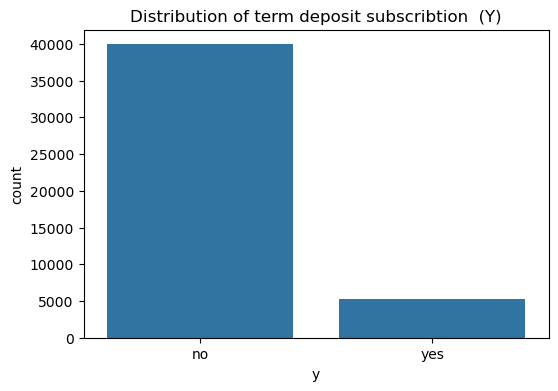

In [35]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of term deposit subscribtion  (Y)')
plt.show()

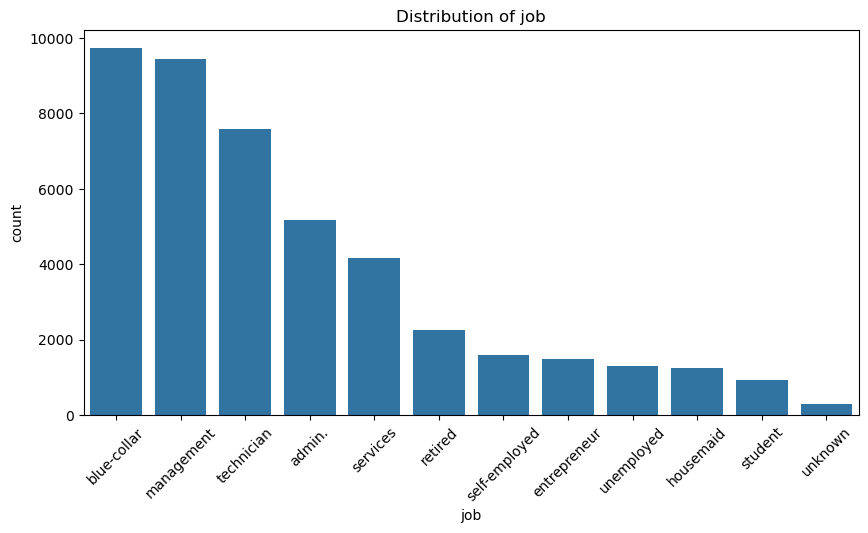

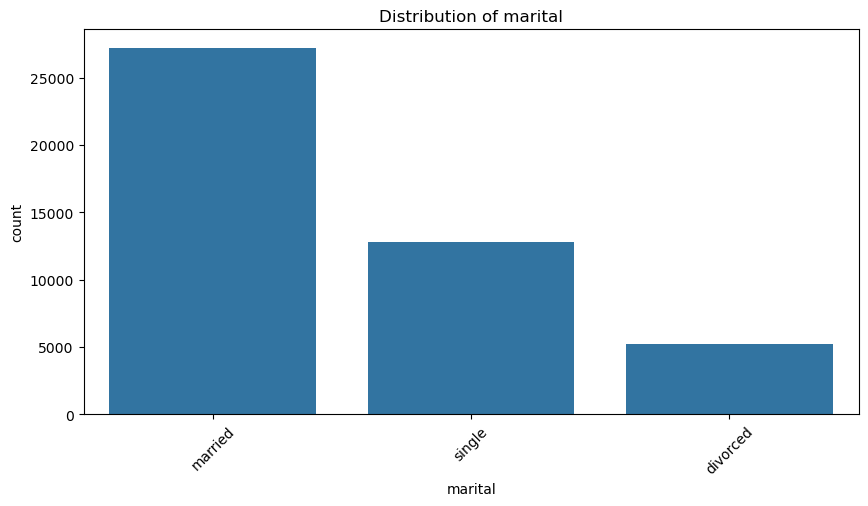

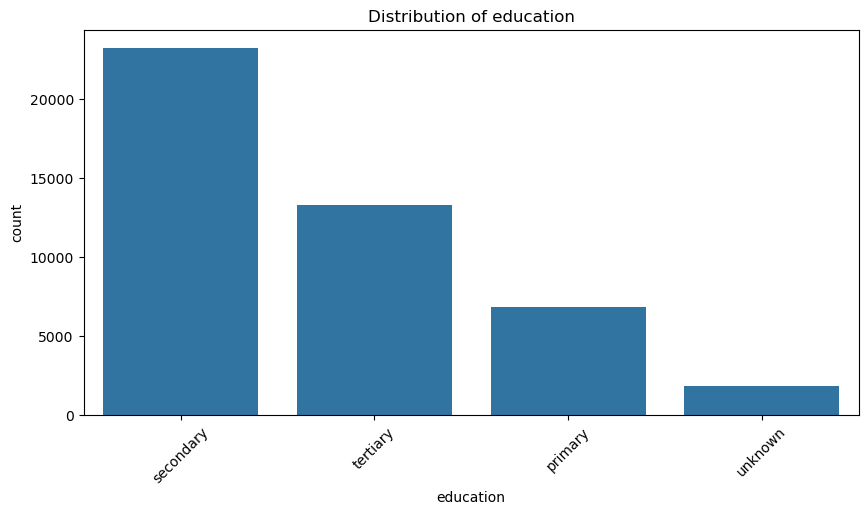

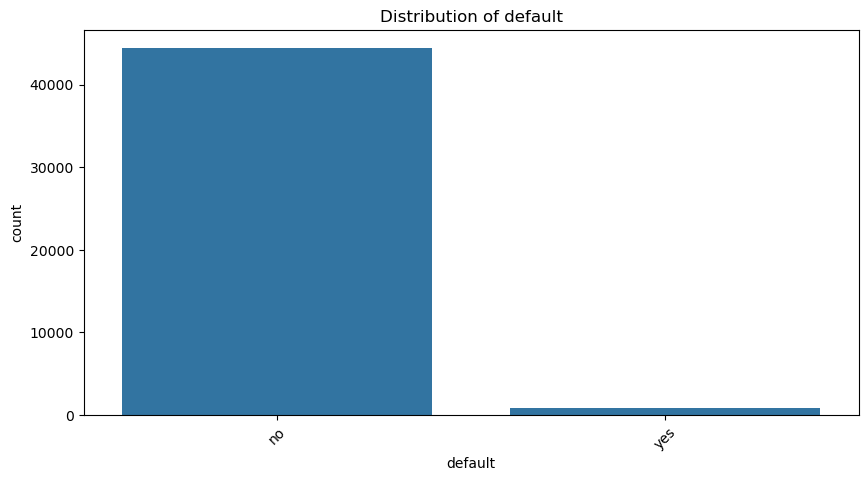

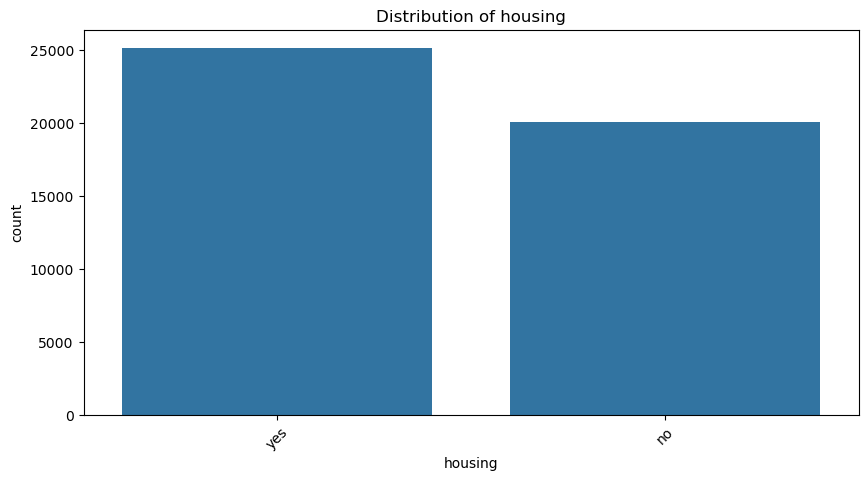

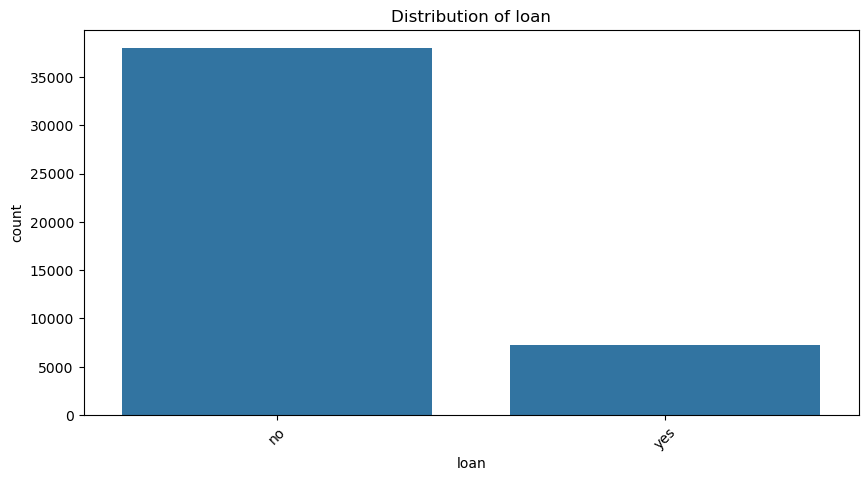

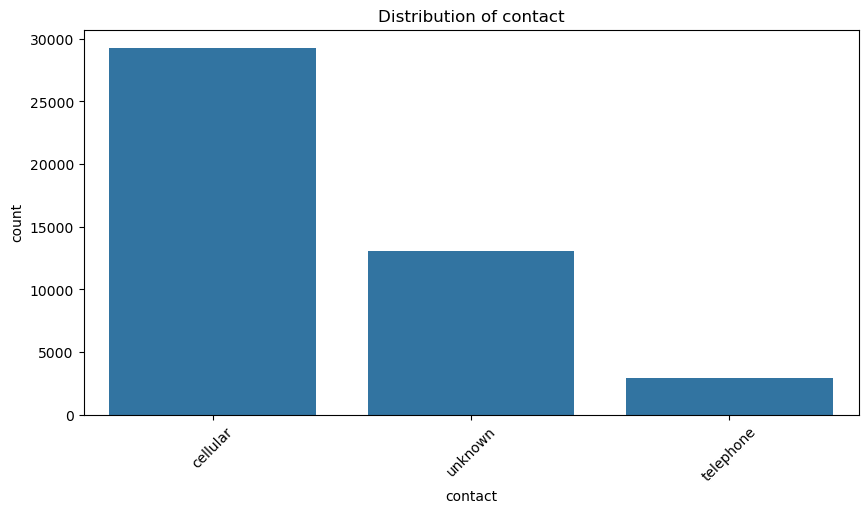

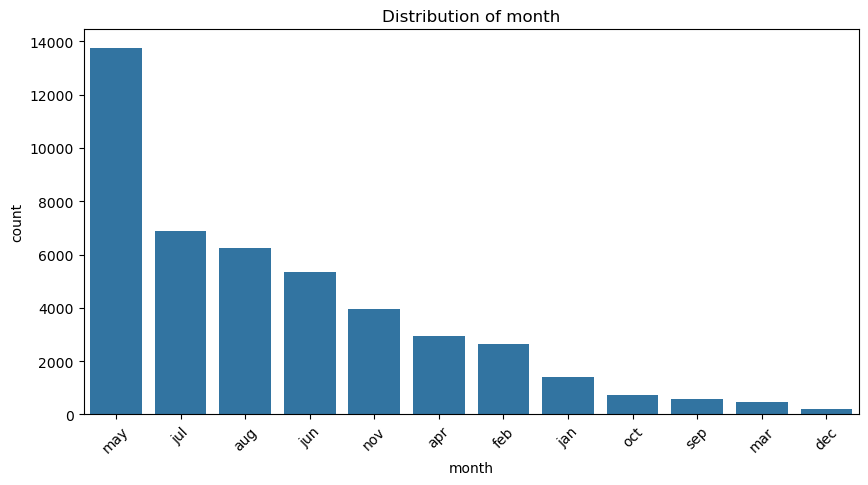

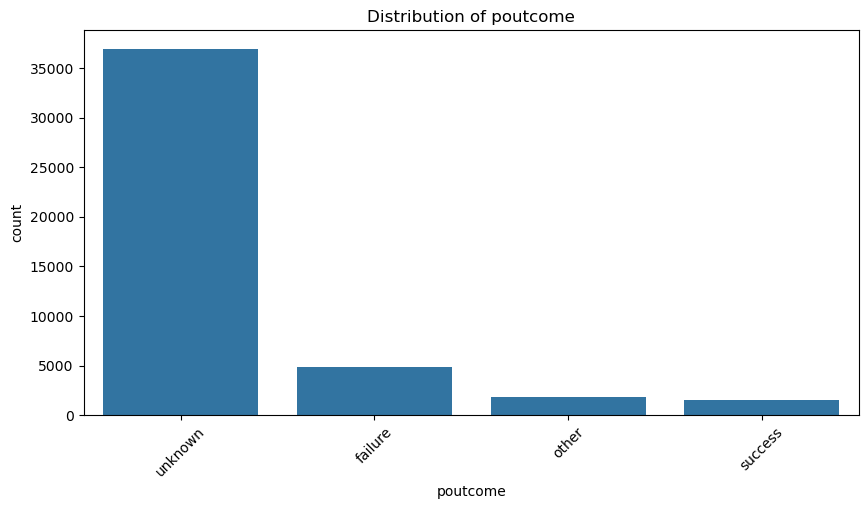

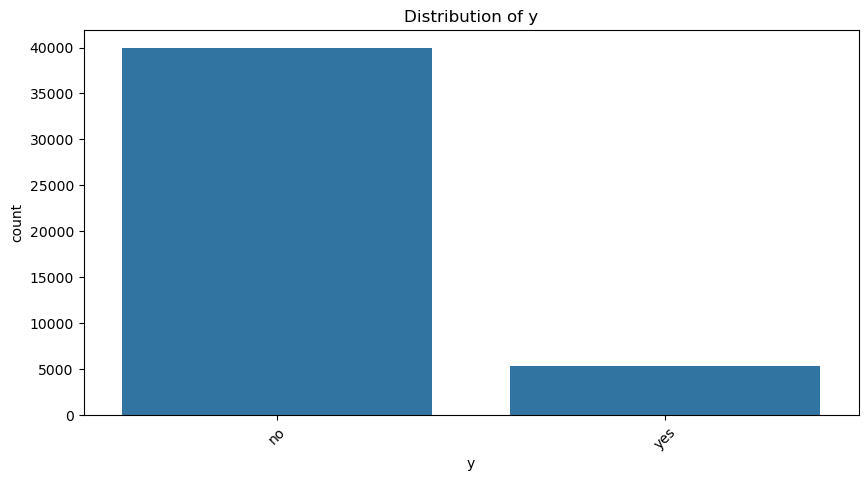

In [31]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

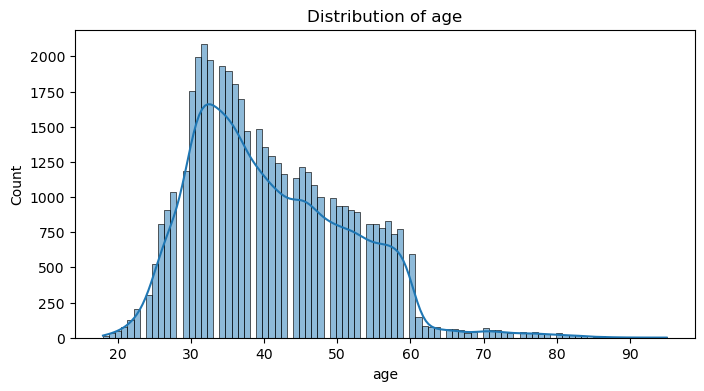

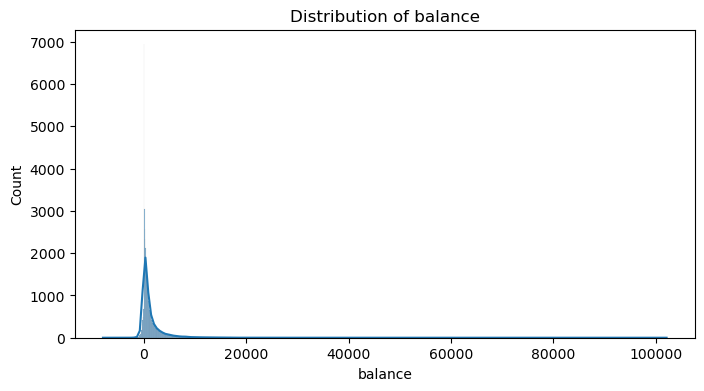

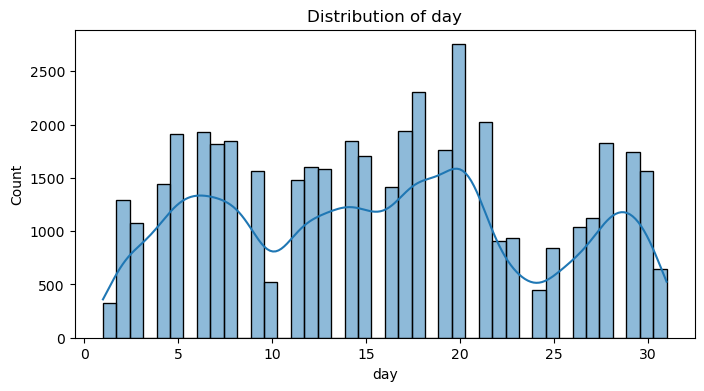

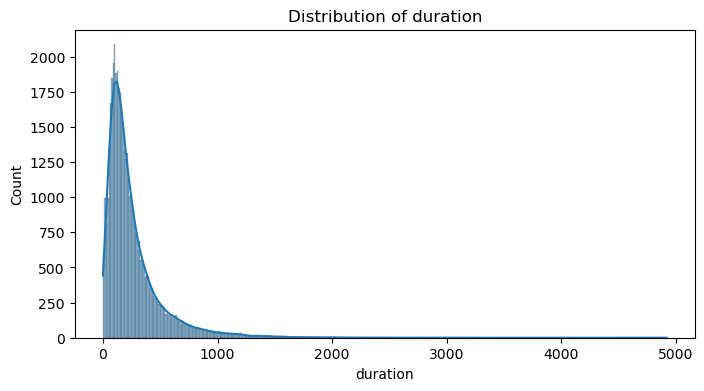

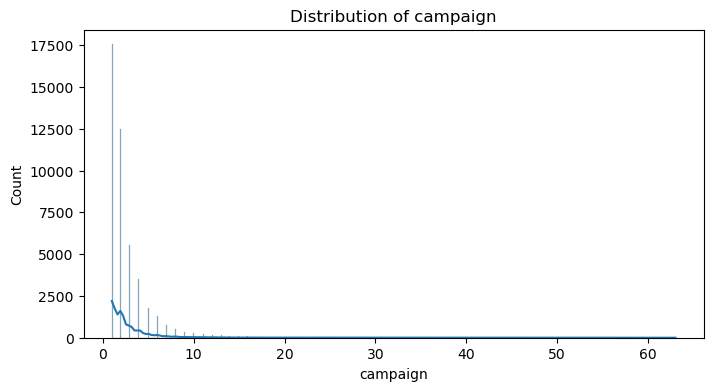

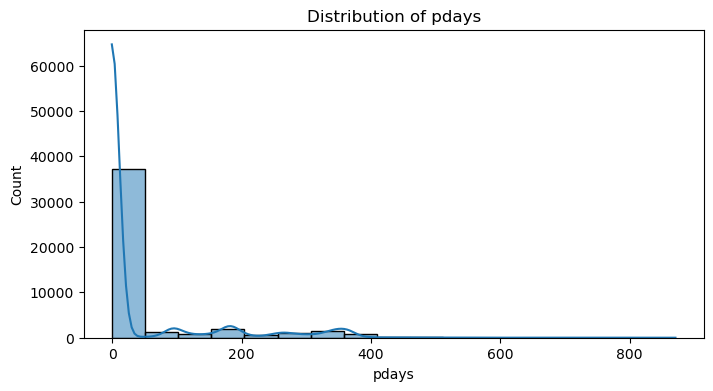

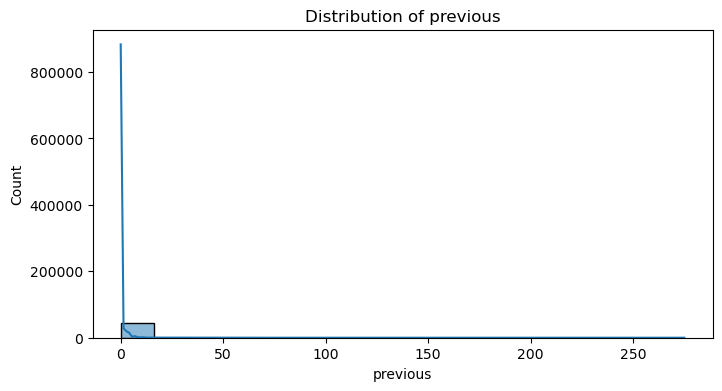

In [39]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

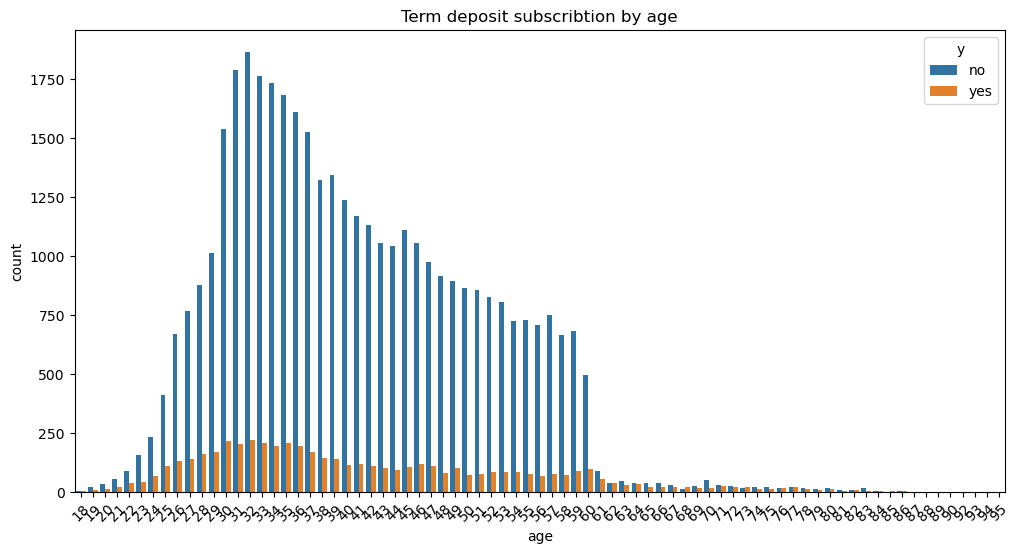

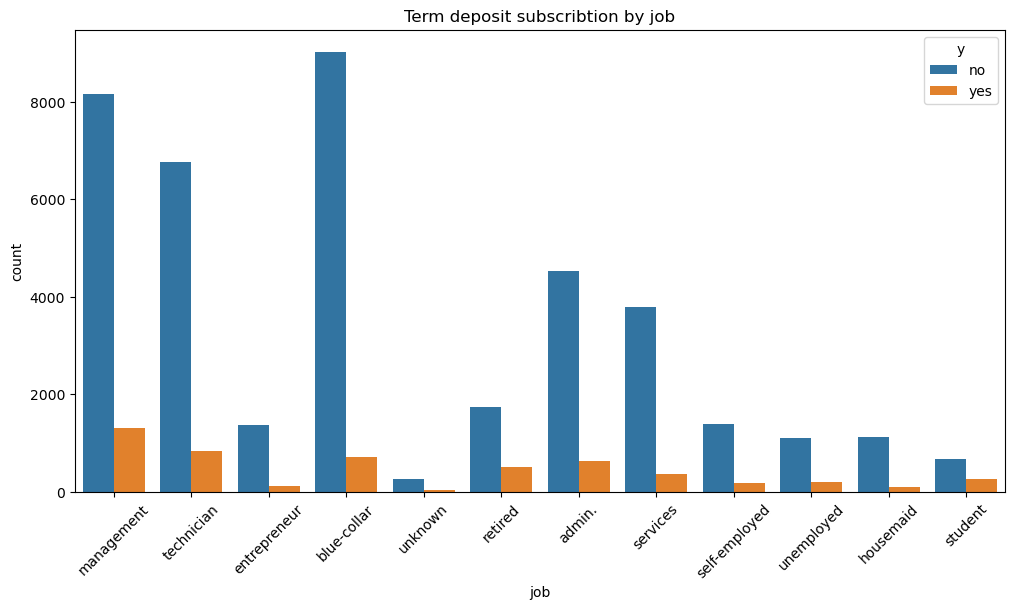

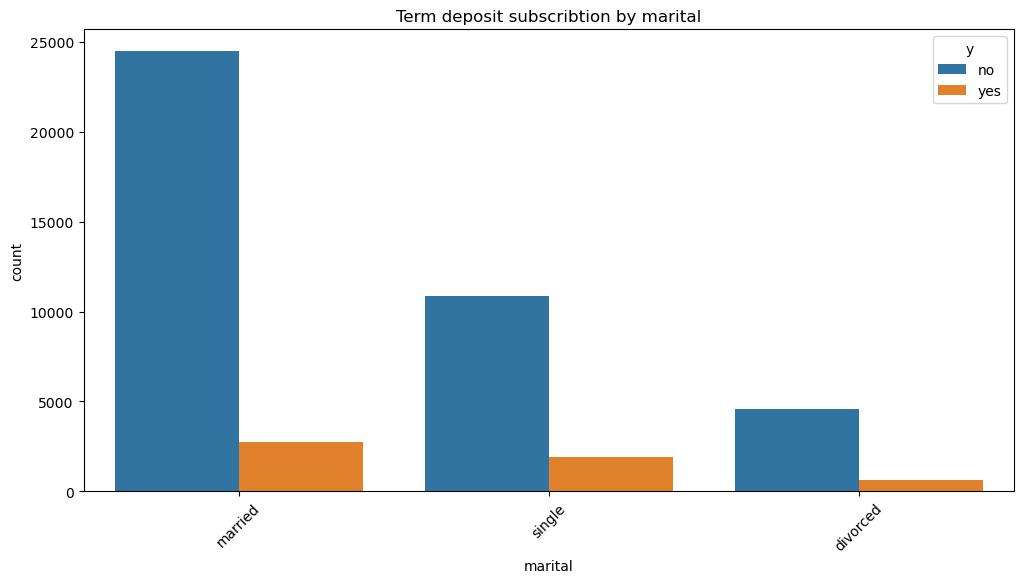

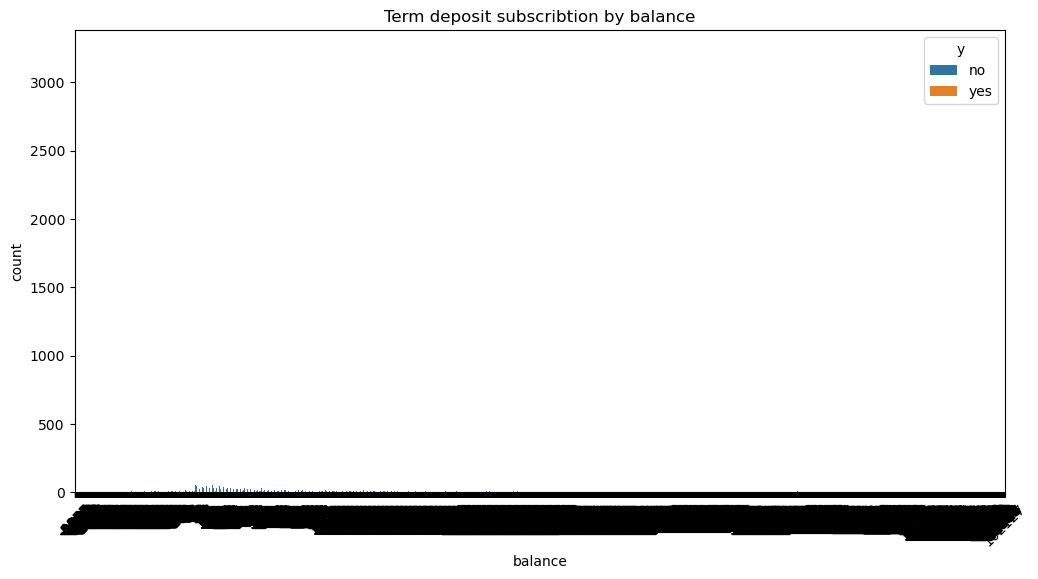

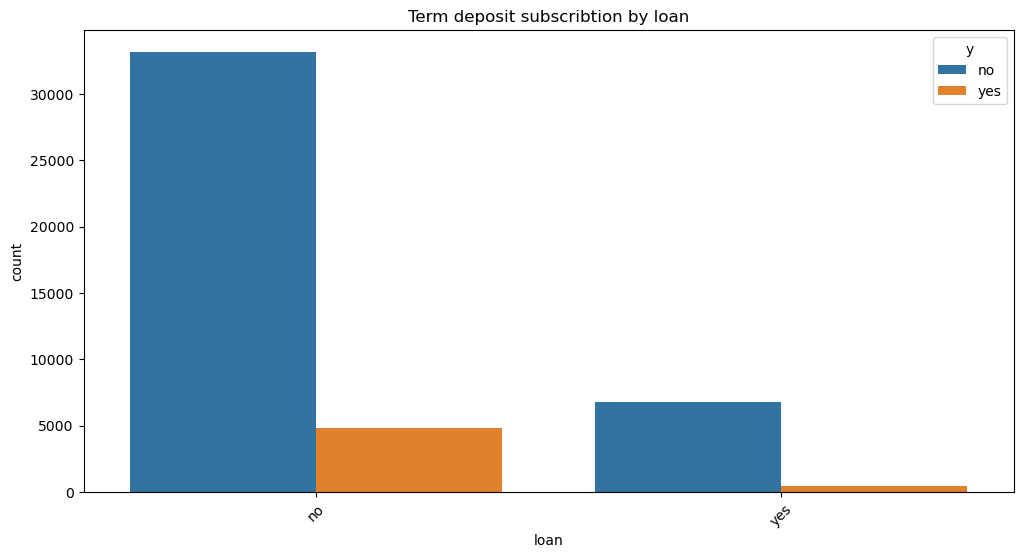

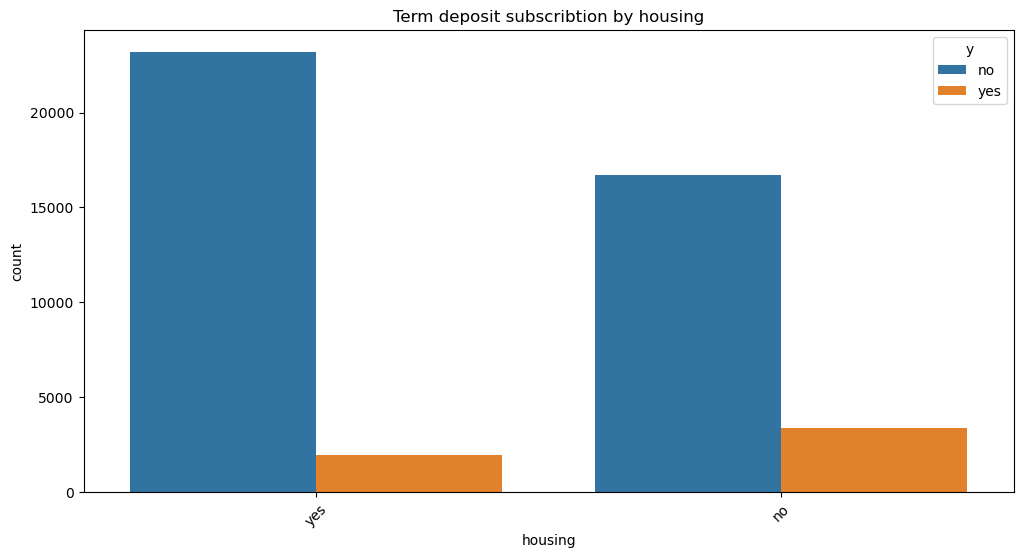

In [58]:

# Analyze Term deposit subscribtion by different categories
for col in ['age', 'job', 'marital', 'balance', 'loan', 'housing']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='y', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Term deposit subscribtion by {col}')
    plt.show()
